# IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
drive.mount('/content/drive')

Mounted at /content/drive


# DATA UNDERSTANDING

In [3]:
df = pd.read_csv('/content/drive/MyDrive/bootcampdibimbing+/Final Project Data Analysis/Project/data/data_cleaning/EDA_dataset.csv')
df.head()

,SalesID,CustomerID,Name,Price,Quantity,Discount,Revenue,Product,Category,Class,VitalityDays,SalesDate,City,Country
0,1,27039,Susan,44.2337,7,0.0,309.63590,Vaccum Bag 10x13,Confections,High,41.0,2018-02-05 07:38:25.430,Albuquerque,United States
1,2,25011,Telly,62.5460,7,0.0,437.82200,Sardines,Grain,Low,90.0,2018-02-02 16:03:31.150,Phoenix,United States
2,3,94024,Jon,79.0184,24,0.0,1896.44160,Crab - Imitation Flakes,Produce,Medium,0.0,2018-05-03 19:31:56.880,Buffalo,United States
3,4,73966,Carol,81.3167,19,0.2,1236.01384,Smirnoff Green Apple Twist,Seafood,High,90.0,2018-04-07 14:43:55.420,Dallas,United States
4,5,32653,Terra,79.9780,9,0.0,719.80200,Coffee - Dark Roast,Poultry,Low,0.0,2018-02-12 15:37:03.940,Charlotte,United States


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 14 columns):
 #   Column        Dtype  
---  ------        -----  
 0   SalesID       int64  
 1   CustomerID    int64  
 2   Name          object 
 3   Price         float64
 4   Quantity      int64  
 5   Discount      float64
 6   Revenue       float64
 7   Product       object 
 8   Category      object 
 9   Class         object 
 10  VitalityDays  float64
 11  SalesDate     object 
 12  City          object 
 13  Country       object 
dtypes: float64(4), int64(3), object(7)
memory usage: 721.8+ MB


In [5]:
# convert typedata to date time
df['SalesDate'] = pd.to_datetime(df['SalesDate'])

In [6]:
display(df.shape)
display(df.info())
display(df.describe())

(6758125, 14)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 14 columns):
 #   Column        Dtype         
---  ------        -----         
 0   SalesID       int64         
 1   CustomerID    int64         
 2   Name          object        
 3   Price         float64       
 4   Quantity      int64         
 5   Discount      float64       
 6   Revenue       float64       
 7   Product       object        
 8   Category      object        
 9   Class         object        
 10  VitalityDays  float64       
 11  SalesDate     datetime64[ns]
 12  City          object        
 13  Country       object        
dtypes: datetime64[ns](1), float64(4), int64(3), object(6)
memory usage: 721.8+ MB


None

,SalesID,CustomerID,Price,Quantity,Discount,Revenue,VitalityDays,SalesDate
count,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6.758125e+06,6758125
mean,3.379063e+06,4.939567e+04,5.082453e+01,1.300401e+01,2.996787e-02,6.410721e+02,2.603532e+01,2018-03-05 21:17:33.550512384
min,1.000000e+00,1.000000e+00,4.490000e-02,1.000000e+00,0.000000e+00,3.592000e-02,0.000000e+00,2018-01-01 00:00:04.070000
25%,1.689532e+06,2.470700e+04,2.657760e+01,7.000000e+00,0.000000e+00,1.806483e+02,0.000000e+00,2018-02-01 06:51:02.190000128
50%,3.379063e+06,4.941400e+04,5.263670e+01,1.300000e+01,0.000000e+00,4.907658e+02,0.000000e+00,2018-03-05 21:31:40.129999872
75%,5.068594e+06,7.407500e+04,7.524860e+01,1.900000e+01,0.000000e+00,9.837400e+02,5.200000e+01,2018-04-07 10:15:25.350000128
max,6.758125e+06,9.875900e+04,9.987550e+01,2.500000e+01,2.000000e-01,2.496888e+03,1.200000e+02,2018-05-09 23:59:59.400000
std,1.950903e+06,2.850504e+04,2.857421e+01,7.209701e+00,6.398096e-02,5.470607e+02,3.902604e+01,NaN


In [7]:
df_numeric = df[['Price', 'Quantity','Discount', 'Revenue', 'VitalityDays']].copy()

In [8]:
summary = df_numeric.apply(lambda col: pd.Series({
          'mean': col.mean(),
                 'median': col.median(),
                 'min': col.min(),
                 'max': col.max(),
                 'pct': abs(col.mean() - col.median()) / (col.max() - col.min()) * 100,
                 'distribusi': 'Normal' if abs(col.mean() - col.median()) / (col.max() - col.min()) * 100 < 5 else 'Skewed' # aproximate < 5 %
             })).T
print(summary)

                    mean    median      min        max        pct distribusi
Price          50.824534   52.6367   0.0449    99.8755   1.815242     Normal
Quantity       13.004007      13.0        1         25   0.016698     Normal
Discount        0.029968       0.0      0.0        0.2  14.983934     Skewed
Revenue       641.072139  490.7658  0.03592  2496.8875   6.019835     Skewed
VitalityDays   26.035319       0.0      0.0      120.0  21.696099     Skewed


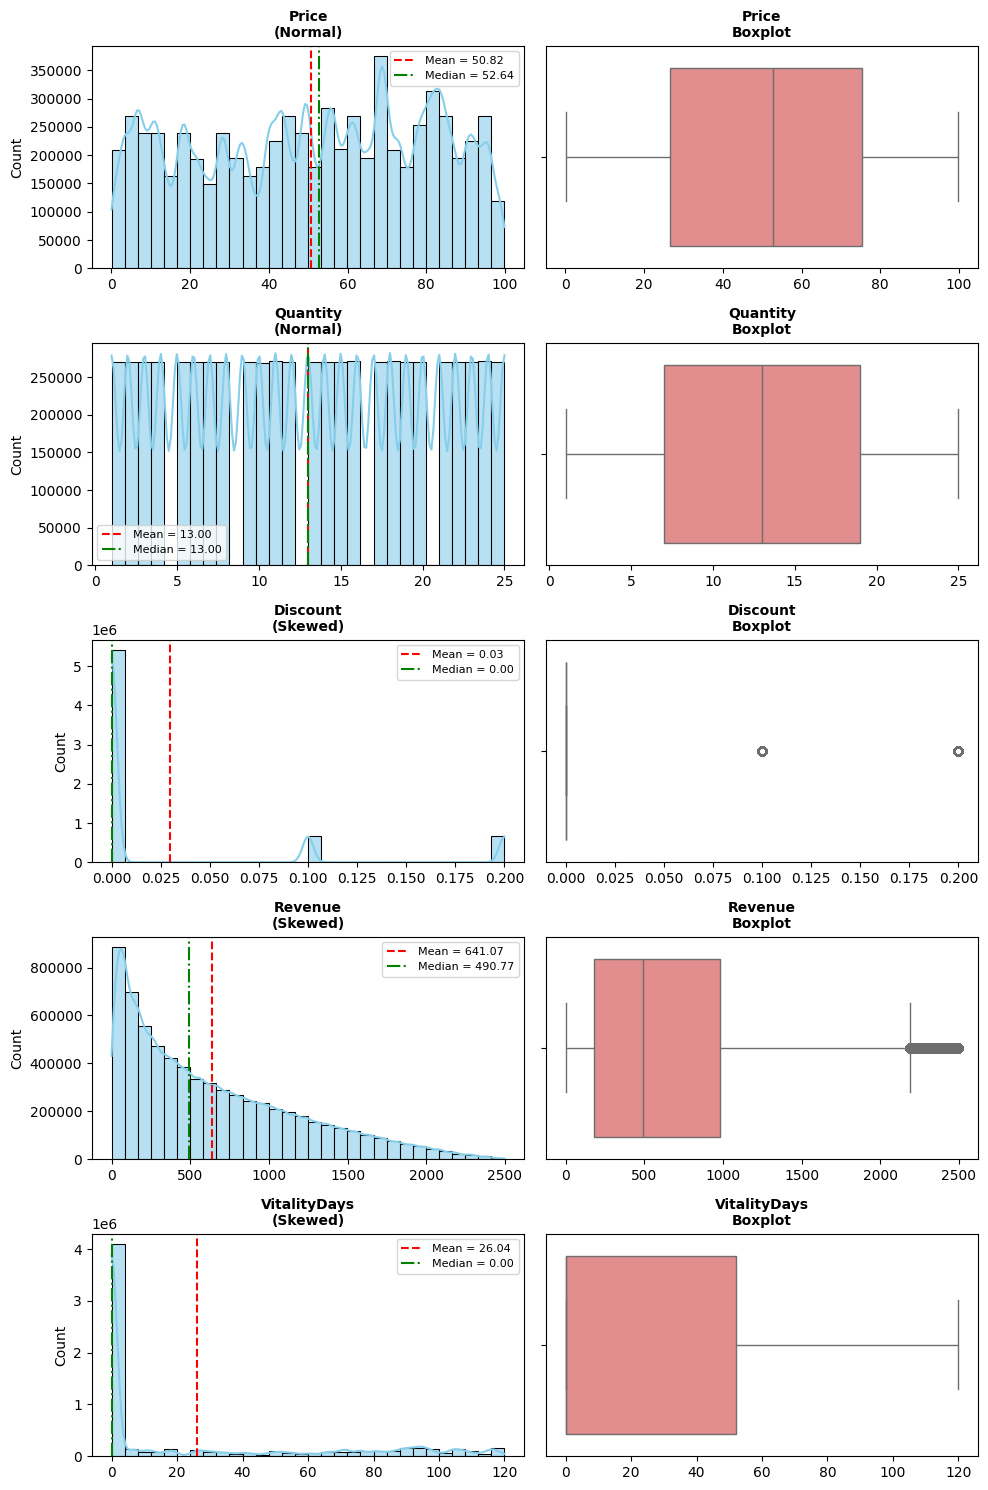

In [9]:
cols = summary.index.tolist()
n = len(cols)
ncols = 2
nrows = n

plt.figure(figsize=(10, 3 * nrows))

for i, col in enumerate(cols):
    s = df_numeric[col].dropna()

    # Histogram
    ax_hist = plt.subplot(nrows, ncols, i*ncols + 1)
    sns.histplot(s, bins=30, kde=True, color='skyblue', edgecolor='k', alpha=0.6, ax=ax_hist)
    mean_val = summary.loc[col, 'mean']
    median_val = summary.loc[col, 'median']
    ax_hist.axvline(mean_val, color='red', linestyle='--', linewidth=1.5, label=f"Mean = {mean_val:.2f}")
    ax_hist.axvline(median_val, color='green', linestyle='-.', linewidth=1.5, label=f"Median = {median_val:.2f}")

    status = summary.loc[col, 'distribusi']
    ax_hist.set_title(f"{col}\n({status})", fontsize=10, fontweight='bold')
    ax_hist.set_xlabel("")
    ax_hist.legend(fontsize=8)

    # Boxplot
    ax_box = plt.subplot(nrows, ncols, i*ncols + 2)
    sns.boxplot(x=s, color='lightcoral', orient='h', ax=ax_box)
    ax_box.set_xlabel("")
    ax_box.set_title(f"{col}\nBoxplot", fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()


# 🔍 Exploratory Data Analysis (EDA)

This Exploratory Data Analysis (EDA) aims to understand transaction patterns, customer behaviour, product performance, and temporal trends based on data available over a 4-month period. The analysis focusses on addressing three key business problems through a structured and data-driven approach.

## 1️⃣ Sales Patterns

This analysis aims to understand transaction patterns and sales trends over time.

**Analysis Questions:**
- What is the overall scale of transactions, total revenue, and customer count
- Is the business driven more by **transaction frequency** or **high transaction value**?
- What are the monthly sales trends and is there any indication of **seasonality**?
- How concentrated is revenue among a small percentage of customers?

### 1.  What is the overall scale of transactions, total revenue, and customer count

In [15]:
# Overall Metrics Transactions, Revenue and Customers
total_transactions = df['SalesID'].nunique()
total_revenue = df['Revenue'].sum()
total_customers = df['CustomerID'].nunique()

print(f"Total Transactions: {total_transactions:,}")
print(f"Total Revenue: ${total_revenue:,.2f}")
print(f"Total Customers: {total_customers:,}")

Total Transactions: 6,758,125
Total Revenue: $4,332,445,646.06
Total Customers: 98,759


### 2. Is the business driven more by transaction frequency or high transaction value?

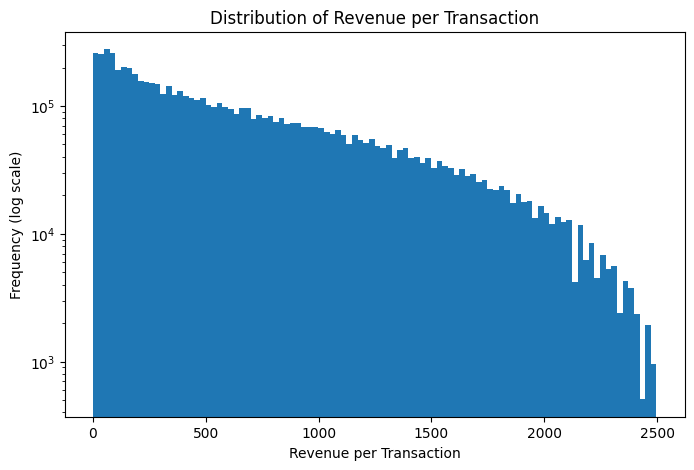

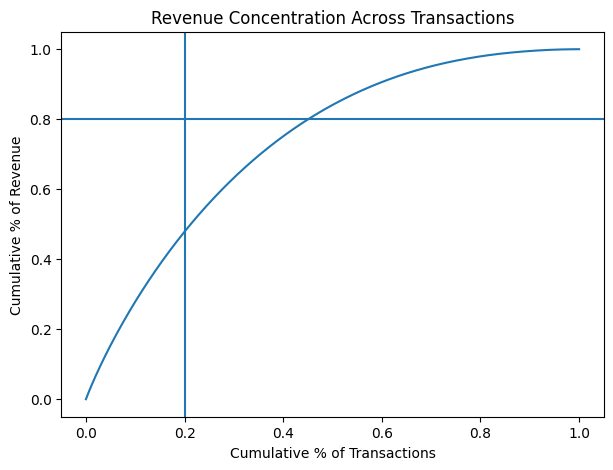

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df['Revenue'], bins=100)
plt.yscale('log')
plt.xlabel('Revenue per Transaction')
plt.ylabel('Frequency (log scale)')
plt.title('Distribution of Revenue per Transaction')
plt.show()

df_sorted = df.sort_values(by='Revenue', ascending=False)

cum_revenue_pct = df_sorted['Revenue'].cumsum() / df_sorted['Revenue'].sum()
cum_transaction_pct = [i / len(df_sorted) for i in range(1, len(df_sorted) + 1)]

plt.figure(figsize=(7,5))
plt.plot(cum_transaction_pct, cum_revenue_pct)
plt.axhline(0.8)
plt.axvline(0.2)
plt.xlabel('Cumulative % of Transactions')
plt.ylabel('Cumulative % of Revenue')
plt.title('Revenue Concentration Across Transactions')
plt.show()

### Insight
The distribution of revenue per transaction is highly right-skewed, indicating that most transactions generate relatively low revenue but occur at very high frequency.
Revenue is not extremely concentrated within a small portion of transactions, confirming that the business is primarily driven by transaction frequency rather than high-value transactions.

### 3. What are the monthly sales trends and is there any indication of seasonality?

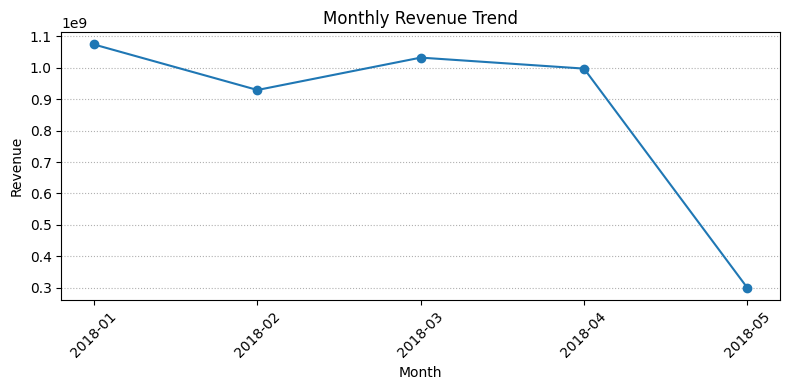

In [17]:
df['Month'] = df['SalesDate'].dt.to_period("M").astype(str)
df_month = df.groupby("Month")["Revenue"].sum()

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(df_month.index, df_month.values, marker='o')
ax.set_title("Monthly Revenue Trend")
ax.set_xlabel("Month")
ax.set_ylabel("Revenue")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=':')
plt.tight_layout()
plt.show()


### Insight
Monthly revenue remains relatively stable from January to April, indicating consistent demand over the observed period.
The sharp decline in May is likely due to incomplete data rather than a true seasonal effect.
Given the limited time span, there is no strong evidence of seasonality, although the observed stability suggests predictable short-term demand patterns.

### 4. How concentrated is revenue among a small percentage of customers?

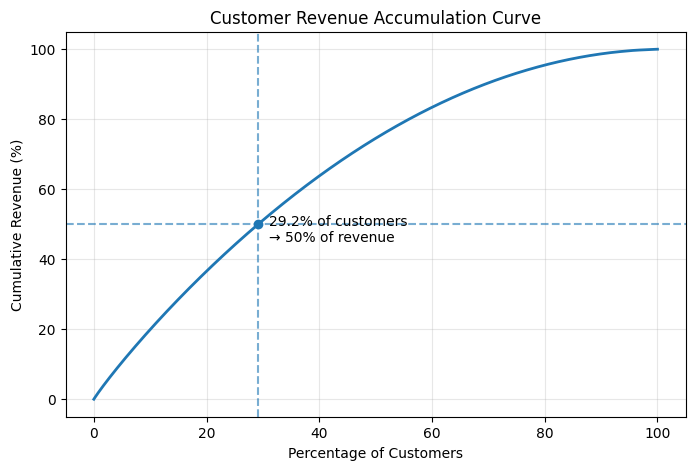

In [18]:
# Revenue per customer
customer_revenue = (
    df.groupby("CustomerID")["Revenue"]
      .sum()
      .sort_values(ascending=False)
)

# Cumulative revenue
cum_rev_pct = customer_revenue.cumsum() / customer_revenue.sum() * 100
cust_pct = np.arange(1, len(customer_revenue)+1) / len(customer_revenue) * 100

# Find customer % at 50% revenue
idx_50 = np.argmax(cum_rev_pct >= 50)
cust_50 = cust_pct[idx_50]

plt.figure(figsize=(8,5))
plt.plot(cust_pct, cum_rev_pct, linewidth=2)

# Highlight point
plt.scatter(cust_50, 50, zorder=5)
plt.axhline(50, linestyle="--", alpha=0.6)
plt.axvline(cust_50, linestyle="--", alpha=0.6)

plt.text(
    cust_50 + 2, 45,
    f"{cust_50:.1f}% of customers\n→ 50% of revenue",
    fontsize=10
)

plt.title("Customer Revenue Accumulation Curve")
plt.xlabel("Percentage of Customers")
plt.ylabel("Cumulative Revenue (%)")
plt.grid(alpha=0.3)
plt.show()

### Insight
Revenue shows a moderate level of concentration, where approximately 29% of customers contribute to 50% of total revenue.
This pattern indicates that while high-value customers play an important role, revenue is not overly dependent on a very small customer segment, reducing the risk associated with losing individual customers.

## 2️⃣ Product & Category Performance

This analysis aims to evaluate the performance of products and categories as revenue contributors.

**Analysis Questions:**
- Which products and categories are the **main revenue drivers**?
- How does revenue trend over time across major product categories?
- Do product characteristics like **shelf-life / vitality days** affect revenue?

### 1. Which products and categories are the main revenue drivers?

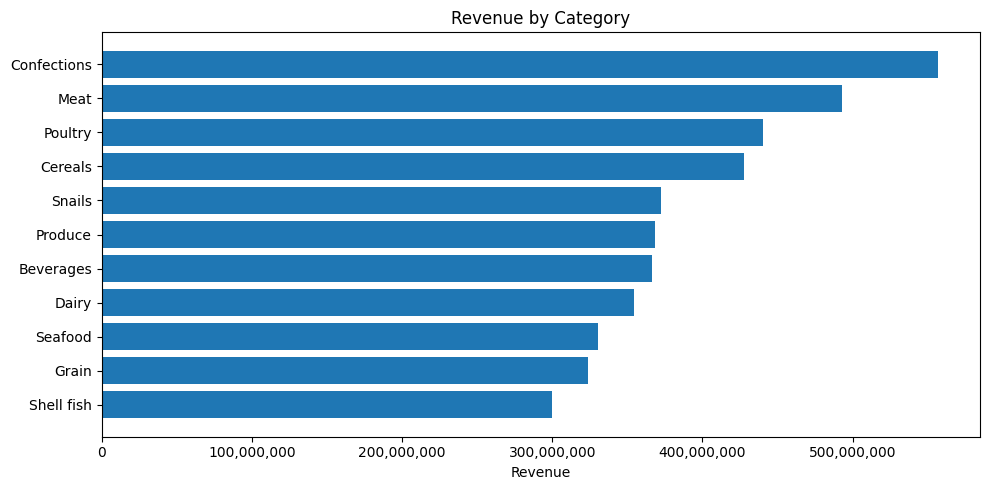

In [ ]:
cat_rev = df.groupby("Category")["Revenue"].sum().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10,5))
ax.barh(cat_rev.index[::-1], cat_rev.values[::-1])
ax.set_title("Revenue by Category")
ax.set_xlabel("Revenue")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()

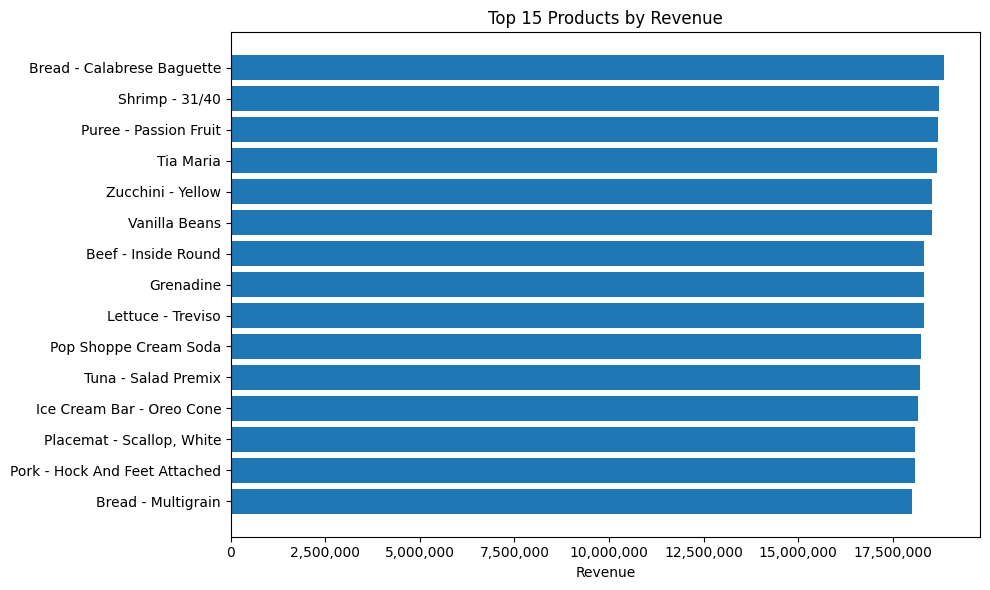

In [ ]:
prod_rev = df.groupby("Product")["Revenue"].sum().sort_values(ascending=False).head(15)

fig, ax = plt.subplots(figsize=(10,6))
ax.barh(prod_rev.index[::-1], prod_rev.values[::-1])
ax.set_title("Top 15 Products by Revenue")
ax.set_xlabel("Revenue")
ax.xaxis.set_major_formatter(FuncFormatter(lambda x, p: format(int(x), ',')))
plt.tight_layout()
plt.show()


### Insight
Revenue distribution across product categories is uneven, with Confections, Meat, and Poultry emerging as the primary revenue drivers. These categories contribute a disproportionately large share of total revenue compared to others.

At the product level, a relatively small group of top-performing products consistently generates the highest revenue, indicating that overall business performance relies on a core subset of products rather than a broad, evenly distributed portfolio. This pattern suggests a dependency on key categories and products, while several other categories remain comparatively under-leveraged.


### 2. How does revenue trend over time across major product categories?


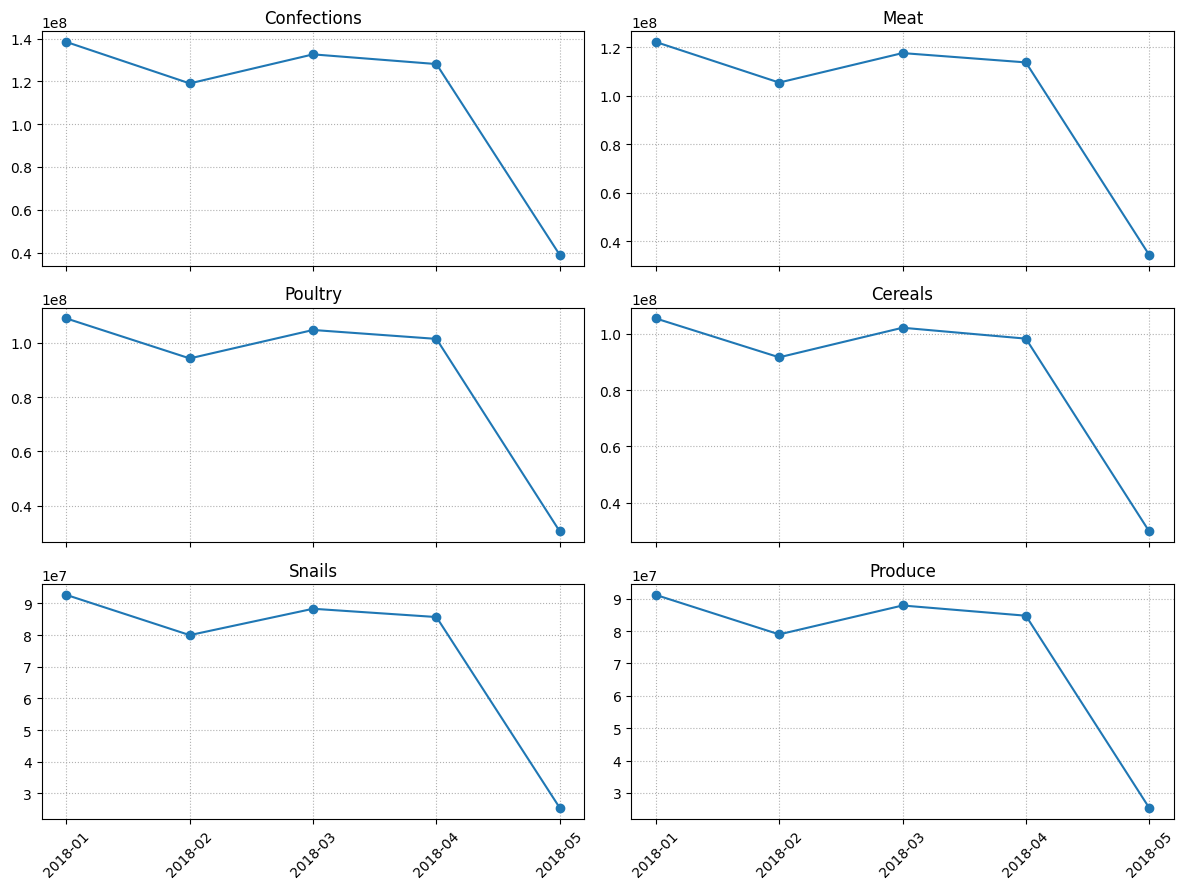

In [ ]:
top_cats = cat_rev.head(6).index  # top 6 categories
df['Month'] = df['SalesDate'].dt.to_period("M").astype(str)
cat_month = df.groupby(['Category','Month'])['Revenue'].sum().reset_index()

fig, axes = plt.subplots(3, 2, figsize=(12,9), sharex=True)
axes = axes.flatten()

for i, cat in enumerate(top_cats):
    sub = cat_month[cat_month['Category'] == cat]
    axes[i].plot(sub['Month'], sub['Revenue'], marker='o')
    axes[i].set_title(cat)
    axes[i].grid(True, linestyle=':')
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Insight
Revenue trends across major product categories follow similar patterns over time, with relatively stable performance from January to April.
The consistent decline observed in May across all categories suggests incomplete data rather than a category-specific performance issue.


### 3. Do product characteristics like shelf-life / vitality days affect revenue?

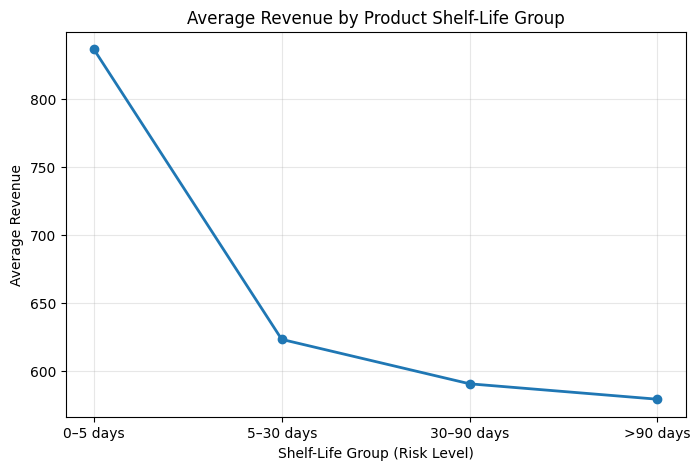

In [ ]:
# 1. Buat shelf-life grouping
bins = [0, 5, 30, 90, df["VitalityDays"].max()]
labels = ["0–5 days", "5–30 days", "30–90 days", ">90 days"]

df["ShelfLifeGroup"] = pd.cut(df["VitalityDays"], bins=bins, labels=labels)

# 2. Hitung average revenue per group
group_summary = (
    df.groupby("ShelfLifeGroup")["Revenue"]
      .mean()
      .reset_index()
)

# 3. Plot
plt.figure(figsize=(8,5))
plt.plot(
    group_summary["ShelfLifeGroup"],
    group_summary["Revenue"],
    marker="o",
    linewidth=2
)

plt.title("Average Revenue by Product Shelf-Life Group")
plt.xlabel("Shelf-Life Group (Risk Level)")
plt.ylabel("Average Revenue")
plt.grid(alpha=0.3)

plt.show()

### Insight
Average revenue varies noticeably across product shelf-life groups. Products with very short shelf-life (0–5 days) generate the highest average revenue, while products with longer shelf-life show progressively lower average revenue. This suggests that product freshness are associated with higher revenue, although further analysis would be required to establish causality.

## 3️⃣ Customer Behaviour & RFM Analysis (Next Notebooks)

This analysis aims to understand customer behaviour, the value generated, and to group customers based on transaction patterns and revenue contribution.